<a href="https://colab.research.google.com/github/nchebet09/Week-2-Core-IP/blob/master/Naomi's_Core_IP_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SECTION 1:** Defining the data analytical question

### a.) Specifying the data analytic question

  > The research problem is to figure out how we can predict which individuals are **most likely to have or use a bank account**. 

### b.) Defining the metric for success
  >Our metric of success will be demonstrated by our ability to show the individuals who use a bank account or who are like to use a bank account. 

### c.) Understanding the context

### d.) Recording the Experimental Design

  > Here is the breakdown of the process:
   1. Started with loading data, and previewing the top and bottom rows
   2. Explored the data a bit to understand the kind of dataset we have
   3. Validated the data from outside source
   4. Cleaning data
   5. Univariate Analysis
   6. Bivariate Analysis
   7. Multivariate Analysis
   8. Conclusion
   9. Challenging the data


### e.) Data Relevance

## **SECTION 2:** Reading and checking the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#Dataset link = ('http://bit.ly/FinancialDataset')
financial = pd.read_csv('http://bit.ly/FinancialDataset')
financial. head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [2]:
# previewing the tail
financial.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [3]:
# checking the number of records
financial.shape

(23524, 13)

In [4]:
#checking for data types
financial.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## **SECTION 3:**. Tidying the dataset

In [5]:
# Standardization - Fixing messy column names. 
# here we fix columns with uppercase, spaces, whitespaces, typos in columns

financial.columns = financial.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('the_relathip_with_head', 'relationship_with_head').str.replace('level_of_educuation', 'level_of_education')
financial.head()


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# checking for missing values
print(financial.isnull().any())
print(financial.isnull().sum())

country                    True
year                      False
uniqueid                  False
has_a_bank_account         True
type_of_location           True
cell_phone_access          True
household_size             True
respondent_age             True
gender_of_respondent       True
relationship_with_head     True
marital_status             True
level_of_education         True
type_of_job                True
dtype: bool
country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of_education        29
type_of_job               30
dtype: int64


In [7]:
#dropping missing values, confirming that the null values have been dropped then returning the shape of our new dataset

financial = financial.dropna()
print(financial.isnull().sum())
print(financial.shape)

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_education        0
type_of_job               0
dtype: int64
(23343, 13)


In [8]:
# checking for statistical summary of our dataset
financial.describe()

,year,household_size,respondent_age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


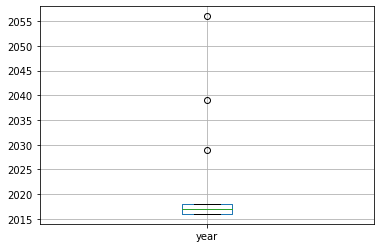

In [9]:
# based on the statistical summaries we see some of the max values are too convoluted
# for example, the max year being 2056 does not make sense. 
# Let us explore these columns further to check on their outliers

# to check for outliers let us plot a boxplot for:
# 1.) year column 

financial.boxplot(['year'])

In [10]:
# from our boxplot above we can see that there are three outliers
# let us pull the rows to see what they look like as shown below 

financial[financial['year'] > 2018]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [11]:
# we dont need these outliers rows from the year column, we shall drop them

financial = financial.drop([213,308, 7014], axis='index')

# To confirm the outliers in the year column have been dropped, let's check the shape of our new data set
financial.shape

(23340, 13)

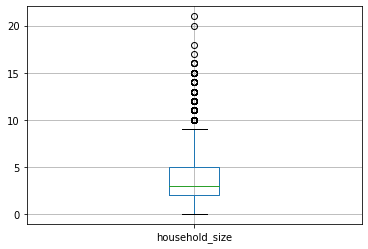

In [12]:
# To check for outliers in household size column
# let us plot a boxplot for:
# 2.) household size column

financial.boxplot(['household_size'])

In [13]:
# pulling the rows from household size column to see how the 'outliers' look like
# out of our total dataset of about 23500 rows, the household size has 376 outliers as shown below
# we will drop these rows to prevent them from skewing our data

financial[financial['household_size'] > 9.0 ]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
34,Kenya,2018,uniqueid_35,No,Rural,Yes,10.0,42.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
92,Kenya,2018,uniqueid_93,Yes,Urban,Yes,10.0,21.0,Female,Parent,Single/Never Married,Tertiary education,Remittance Dependent
100,Kenya,2018,uniqueid_101,No,Urban,Yes,10.0,23.0,Female,Other relative,Divorced/Seperated,Primary education,Formally employed Private
348,Kenya,2018,uniqueid_349,No,Urban,Yes,12.0,23.0,Female,Child,Single/Never Married,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23461,Uganda,2018,uniqueid_2046,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,uniqueid_2053,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23471,Uganda,2018,uniqueid_2056,No,Rural,Yes,15.0,17.0,Female,Other relative,Married/Living together,Secondary education,Self employed
23482,Uganda,2018,uniqueid_2070,No,Rural,No,10.0,18.0,Female,Parent,Married/Living together,Secondary education,Self employed


In [14]:
# dropping the household outliers

financial.drop(financial[financial['household_size'] > 9.0].index, inplace = True)

In [15]:
# checking the new dataset
print(financial.shape)

(22964, 13)


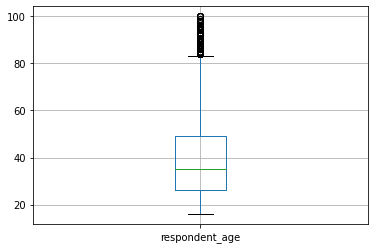

In [16]:
# To check for outliers in respondent age column
# let us plot a boxplot for:
# 3.) respondent age column

financial.boxplot(['respondent_age'])

In [17]:
# pulling the rows from respondent_age column to see how they look like:

financial[financial['respondent_age'] > 82.0 ]

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
209,Kenya,2018,uniqueid_210,No,Rural,No,3.0,95.0,Female,Parent,Widowed,No formal education,Informally employed
268,Kenya,2018,uniqueid_269,No,Urban,Yes,1.0,85.0,Female,Head of Household,Widowed,Primary education,Remittance Dependent
340,Kenya,2018,uniqueid_341,No,Rural,No,2.0,95.0,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
366,Kenya,2018,uniqueid_367,No,Rural,No,1.0,86.0,Female,Head of Household,Widowed,Primary education,Remittance Dependent
370,Kenya,2018,uniqueid_371,No,Rural,Yes,3.0,95.0,Male,Head of Household,Married/Living together,Primary education,Other Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,Uganda,2018,uniqueid_1573,No,Rural,No,4.0,95.0,Female,Spouse,Married/Living together,Primary education,No Income
23053,Uganda,2018,uniqueid_1631,No,Urban,No,2.0,98.0,Female,Head of Household,Widowed,No formal education,No Income
23352,Uganda,2018,uniqueid_1930,No,Rural,Yes,3.0,86.0,Male,Head of Household,Divorced/Seperated,No formal education,No Income
23395,Uganda,2018,uniqueid_1976,No,Rural,No,2.0,85.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income


In [18]:
# we will also drop the respondent age outliers as shown below

financial.drop(financial[financial['respondent_age'] > 82.0].index, inplace = True)

In [19]:
# checking the new dataset
print(financial.shape)


(22692, 13)


In [20]:
# renaming our cleaned data:

financial_cleaned = financial
print(financial_cleaned.shape)

(22692, 13)


## **SECTION 4:** Univariate Analysis

In [21]:
# checking for statistical summaries of our cleaned data:

financial_cleaned.describe()

,year,household_size,respondent_age
count,22692.000000,22692.000000,22692.000000
mean,2016.968403,3.581659,38.283051
std,0.846313,2.080544,15.725571
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,82.000000


In [22]:
# checking for skewness and kurtosis in respondent_age
print(financial_cleaned['respondent_age'].skew())
print(financial_cleaned['respondent_age'].kurt())


0.7318351518247519
-0.2589064137567383


In [23]:
# checking for skewness and kurtosis for household_size
print(financial_cleaned['household_size'].skew())
print(financial_cleaned['household_size'].kurt())

0.604233257288344
-0.5075944826433418


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe25c1fbe0>,
      dtype=object)

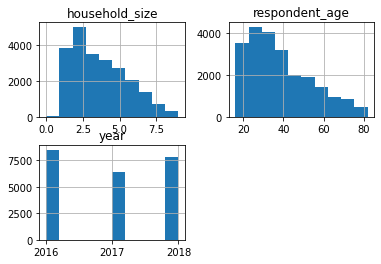

In [24]:
# Plotting the univariate summaries for numerical data types and recording our observations
financial_cleaned.hist()

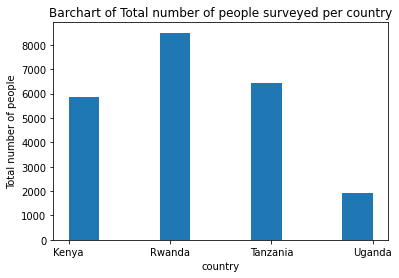

In [25]:
# We shall then explore categorical variables and the two numerical variables (respondent age and household size) using bar charts. 
# Doing this process is useful in understanding our dataset from a broader perspective

# 1. Let's start with country column:

country = financial_cleaned['country']

plt.hist(country, histtype='bar', rwidth=1)
plt.xlabel('country')
plt.ylabel('Total number of people')
plt.title('Barchart of Total number of people surveyed per country')
plt.show()

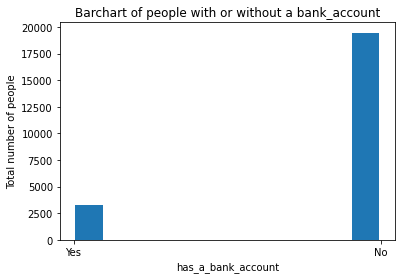

In [26]:
# 2. bar chart of have a bank account column:

has_a_bank_account = financial_cleaned['has_a_bank_account']

plt.hist(has_a_bank_account, histtype='bar', rwidth=0.9)
plt.xlabel('has_a_bank_account')
plt.ylabel('Total number of people')
plt.title('Barchart of people with or without a bank_account')
plt.show()

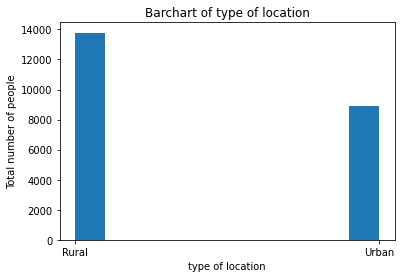

In [27]:
# 3. bar chart of type of location

type_of_location = financial_cleaned['type_of_location']

plt.hist(type_of_location, histtype='bar', rwidth=1)
plt.xlabel('type of location')
plt.ylabel('Total number of people')
plt.title('Barchart of type of location')
plt.show()

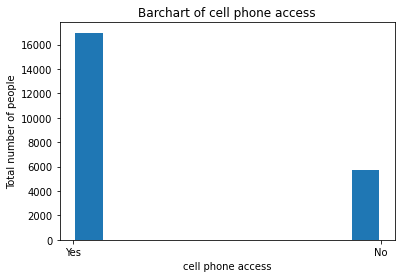

In [28]:
# 4. bar chart of people with cell phone access

cell_phone_access = financial_cleaned['cell_phone_access']

plt.hist(cell_phone_access, histtype='bar', rwidth=0.9)
plt.xlabel('cell phone access')
plt.ylabel('Total number of people')
plt.title('Barchart of cell phone access')
plt.show()

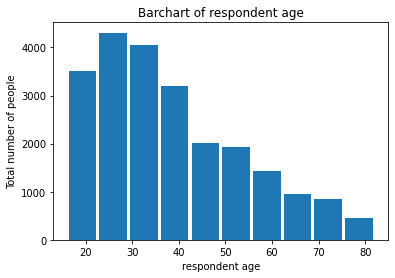

In [29]:
# 5. bar chart of respondent age

respondent_age = financial_cleaned['respondent_age']

plt.hist(respondent_age, histtype='bar', rwidth=0.9)
plt.xlabel('respondent age')
plt.ylabel('Total number of people')
plt.title('Barchart of respondent age')
plt.show()

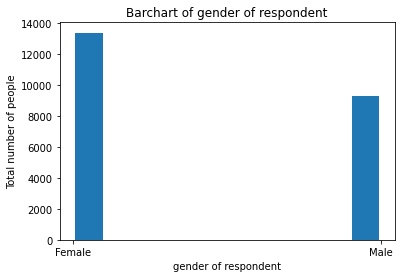

In [30]:
# 6. bar chart of gender

gender_of_respondent = financial_cleaned['gender_of_respondent']

plt.hist(gender_of_respondent, histtype='bar', rwidth=0.9)
plt.xlabel('gender of respondent')
plt.ylabel('Total number of people')
plt.title('Barchart of gender of respondent')
plt.show()

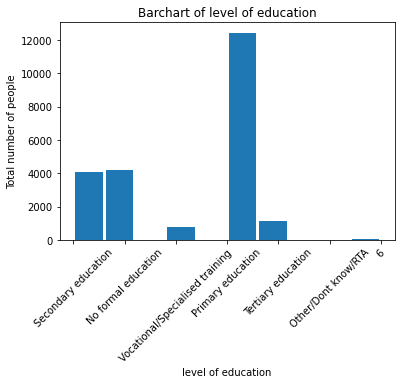

In [31]:
# 7. bar chart of level of education

level_of_education = financial_cleaned['level_of_education']

plt.hist(level_of_education, histtype='bar', rwidth=0.9)
plt.xticks(rotation=45)
plt.xlabel('level of education')
plt.ylabel('Total number of people')
plt.title('Barchart of level of education')
plt.show()

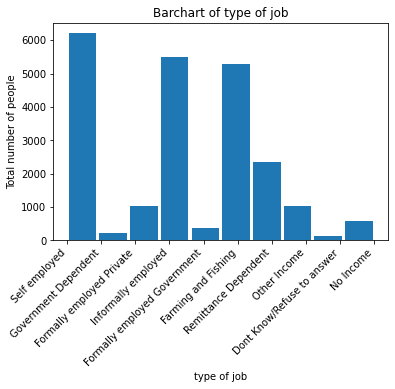

In [32]:
# 8. bar chart of type of job

type_of_job = financial_cleaned['type_of_job']

plt.hist(type_of_job, histtype='bar', rwidth=0.9)
plt.xticks(rotation=45,horizontalalignment='right',
    fontweight='light',
    fontsize='medium')
plt.xlabel('type of job')
plt.ylabel('Total number of people')
plt.title('Barchart of type of job')
plt.show()

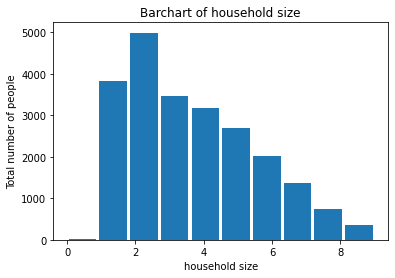

In [33]:
# 9. bar chart of household size

household_size = financial_cleaned['household_size']

plt.hist(household_size, histtype='bar', rwidth=0.9)
plt.xlabel('household size')
plt.ylabel('Total number of people')
plt.title('Barchart of household size')
plt.show()

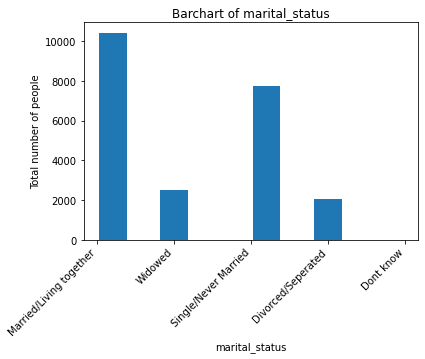

In [34]:
# 10. bar chart of marital status

marital_status = financial_cleaned['marital_status']

plt.hist(marital_status, histtype='bar', rwidth=0.9)
plt.xticks(rotation=45,horizontalalignment='right',
    fontweight='light',
    fontsize='medium')
plt.xlabel('marital_status')
plt.ylabel('Total number of people')
plt.title('Barchart of marital_status')
plt.show()

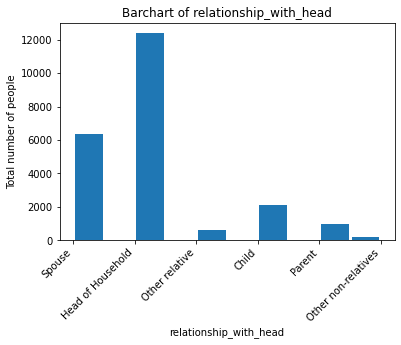

In [35]:
# 11. bar chart of relationship_with_head

relationship_with_head = financial_cleaned['relationship_with_head']

plt.hist(relationship_with_head, histtype='bar', rwidth=0.9)
plt.xticks(rotation=45,horizontalalignment='right',
    fontweight='light',
    fontsize='medium')
plt.xlabel('relationship_with_head')
plt.ylabel('Total number of people')
plt.title('Barchart of relationship_with_head')
plt.show()

  ##  Univariate summaries
  1. A big percentage of the data was taken by between individuals age between 16-55years
 

# SECTION 5: Bivariate Analysis

In [36]:
# To start off we will find the correlation coefficient for the numerical variables excluding the year:

print(financial_cleaned['household_size'].corr(financial_cleaned['respondent_age']))

# with a correlation coefficient of -0.10, we can conclude that 
# the relationship between the two variables is very weak


-0.1044304631221166


,has_a_bank_account,type_of_location,total_individuals,%_total_individuals
3,Yes,Urban,1620,7.14
2,Yes,Rural,1613,7.11
0,No,Rural,12168,53.62
1,No,Urban,7291,32.13


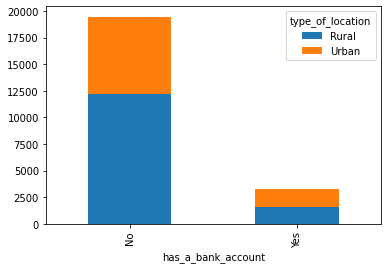

In [37]:
# After finding the correlation, we will then run bivariate analysis of individuals with a bank or not 
# together with another variable in the dataset to understand how these other variables 
# affects the chances of an individual having a bank or not

# Let's start off with 

# 1. the location:

# used a bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['type_of_location']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_location = financial_cleaned[['has_a_bank_account', 'type_of_location', 'uniqueid']]
bank_location_grouped = bank_location.groupby(['has_a_bank_account', 'type_of_location']).count().reset_index()
bank_location_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_location_grouped['%_total_individuals'] = round(bank_location_grouped ['total_individuals']/bank_location_grouped['total_individuals'].sum()*100, 2)
bank_location_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)


,has_a_bank_account,age_bins,respondent_age,total_individuals,%_total_individuals
9,Yes,Aged 30-39,1017,1017,4.48
8,Yes,Aged 20-29,812,812,3.58
10,Yes,Aged 40-49,622,622,2.74
11,Yes,Aged 50-59,398,398,1.75
12,Yes,Aged 60-69,183,183,0.81
13,Yes,Aged 70-79,115,115,0.51
14,Yes,Aged < 20,60,60,0.26
15,Yes,Aged > 80,26,26,0.11
0,No,Aged 20-29,5111,5111,22.52
1,No,Aged 30-39,4813,4813,21.21


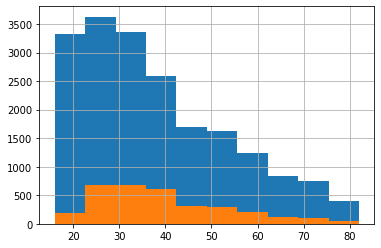

In [38]:
# 2. respondent age:

# used a histogram for visualization
financial_cleaned.groupby('has_a_bank_account').respondent_age.hist()

# for the age column, we first created age groups for defferent decades as shown with the code below:
financial_cleaned['age_bins'] = 'Aged < 20'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 20, 'age_bins'] = 'Aged 20-29'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 30, 'age_bins'] = 'Aged 30-39'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 40, 'age_bins'] = 'Aged 40-49'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 50, 'age_bins'] = 'Aged 50-59'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 60, 'age_bins'] = 'Aged 60-69'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 70, 'age_bins'] = 'Aged 70-79'
financial_cleaned.loc[financial_cleaned['respondent_age'] >= 80, 'age_bins'] = 'Aged > 80'

# then calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_age = financial_cleaned[['respondent_age', 'age_bins','has_a_bank_account', 'uniqueid' ]]

bank_age_grouped = bank_age.groupby(['has_a_bank_account','age_bins']).count().reset_index()
bank_age_grouped
bank_age_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)
bank_age_grouped

bank_age_grouped['%_total_individuals'] = round(bank_age_grouped ['total_individuals']/bank_age_grouped['total_individuals'].sum()*100, 2)
bank_age_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)


,has_a_bank_account,type_of_job,total_individuals,%_total_individuals
19,Yes,Self employed,835,3.68
11,Yes,Farming and Fishing,619,2.73
13,Yes,Formally employed Private,564,2.49
15,Yes,Informally employed,438,1.93
12,Yes,Formally employed Government,297,1.31
18,Yes,Remittance Dependent,229,1.01
17,Yes,Other Income,183,0.81
14,Yes,Government Dependent,41,0.18
10,Yes,Dont Know/Refuse to answer,14,0.06
16,Yes,No Income,13,0.06


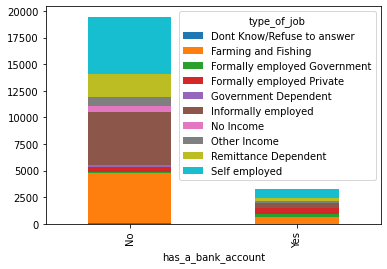

In [39]:
# 3. Type of job:

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['type_of_job']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_job = financial_cleaned[['has_a_bank_account', 'type_of_job', 'uniqueid']]
bank_job_grouped = bank_job.groupby(['has_a_bank_account', 'type_of_job']).count().reset_index()
bank_job_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_job_grouped['%_total_individuals'] = round(bank_job_grouped ['total_individuals']/bank_job_grouped['total_individuals'].sum()*100, 2)
bank_job_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)


,has_a_bank_account,level_of_education,total_individuals,%_total_individuals
9,Yes,Primary education,1059,4.67
10,Yes,Secondary education,968,4.27
11,Yes,Tertiary education,584,2.57
12,Yes,Vocational/Specialised training,450,1.98
7,Yes,No formal education,161,0.71
8,Yes,Other/Dont know/RTA,6,0.03
6,Yes,6,5,0.02
2,No,Primary education,11371,50.11
1,No,No formal education,4052,17.86
3,No,Secondary education,3131,13.80


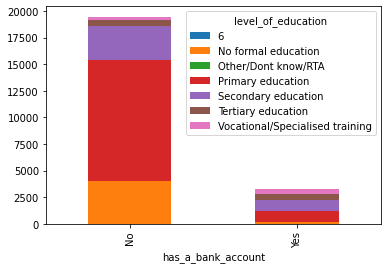

In [40]:
# 4. level of education;

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['level_of_education']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_education = financial_cleaned[['has_a_bank_account', 'level_of_education', 'uniqueid']]
bank_education_grouped = bank_education.groupby(['has_a_bank_account', 'level_of_education']).count().reset_index()
bank_education_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_education_grouped['%_total_individuals'] = round(bank_education_grouped ['total_individuals']/bank_education_grouped['total_individuals'].sum()*100, 2)
bank_education_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)



,has_a_bank_account,cell_phone_access,total_individuals,%_total_individuals
3,Yes,Yes,3140,13.84
2,Yes,No,93,0.41
1,No,Yes,13830,60.95
0,No,No,5629,24.81


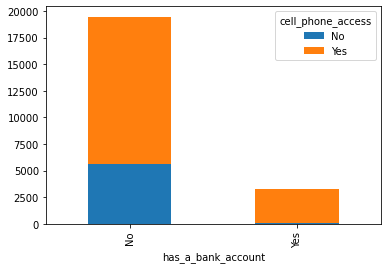

In [41]:
# 5. Cell phone access

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['cell_phone_access']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_phone = financial_cleaned[['has_a_bank_account', 'cell_phone_access', 'uniqueid']]
bank_phone_grouped = bank_phone.groupby(['has_a_bank_account', 'cell_phone_access']).count().reset_index()
bank_phone_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_phone_grouped['%_total_individuals'] = round(bank_phone_grouped ['total_individuals']/bank_phone_grouped['total_individuals'].sum()*100, 2)
bank_phone_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)


,has_a_bank_account,gender_of_respondent,total_individuals,%_total_individuals
3,Yes,Male,1781,7.85
2,Yes,Female,1452,6.40
0,No,Female,11927,52.56
1,No,Male,7532,33.19


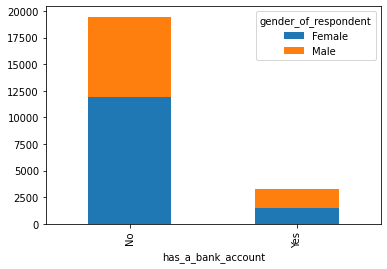

In [42]:
# 6. Gender

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['gender_of_respondent']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_gender = financial_cleaned[['has_a_bank_account', 'gender_of_respondent', 'uniqueid']]
bank_gender_grouped = bank_gender.groupby(['has_a_bank_account', 'gender_of_respondent']).count().reset_index()
bank_gender_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_gender_grouped['%_total_individuals'] = round(bank_gender_grouped ['total_individuals']/bank_gender_grouped['total_individuals'].sum()*100, 2)
bank_gender_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)


,has_a_bank_account,household_size,total_individuals,%_total_individuals
11,Yes,1.0,666,2.93
12,Yes,2.0,620,2.73
13,Yes,3.0,501,2.21
14,Yes,4.0,469,2.07
15,Yes,5.0,410,1.81
16,Yes,6.0,268,1.18
17,Yes,7.0,177,0.78
18,Yes,8.0,85,0.37
19,Yes,9.0,36,0.16
10,Yes,0.0,1,0.00


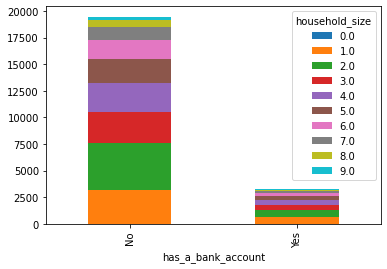

In [43]:
#7. Household size

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['household_size']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_size = financial_cleaned[['has_a_bank_account', 'household_size', 'uniqueid']]
bank_size_grouped = bank_size.groupby(['has_a_bank_account', 'household_size']).count().reset_index()
bank_size_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_size_grouped['%_total_individuals'] = round(bank_size_grouped ['total_individuals']/bank_size_grouped['total_individuals'].sum()*100, 2)
bank_size_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)


,has_a_bank_account,marital_status,total_individuals,%_total_individuals
7,Yes,Married/Living together,1826,8.05
8,Yes,Single/Never Married,946,4.17
5,Yes,Divorced/Seperated,229,1.01
9,Yes,Widowed,230,1.01
6,Yes,Dont know,2,0.01
2,No,Married/Living together,8596,37.88
3,No,Single/Never Married,6798,29.96
4,No,Widowed,2261,9.96
0,No,Divorced/Seperated,1798,7.92
1,No,Dont know,6,0.03


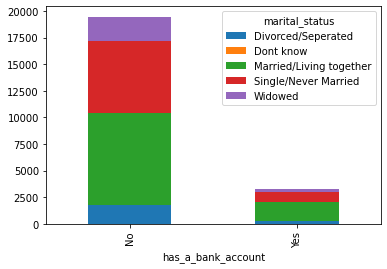

In [44]:
#8. marital status

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['marital_status']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_status = financial_cleaned[['has_a_bank_account', 'marital_status', 'uniqueid']]
bank_status_grouped = bank_status.groupby(['has_a_bank_account', 'marital_status']).count().reset_index()
bank_status_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_status_grouped['%_total_individuals'] = round(bank_status_grouped ['total_individuals']/bank_status_grouped['total_individuals'].sum()*100, 2)
bank_status_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)

,has_a_bank_account,country,total_individuals,%_total_individuals
4,Yes,Kenya,1490,6.57
5,Yes,Rwanda,979,4.31
6,Yes,Tanzania,598,2.64
7,Yes,Uganda,166,0.73
1,No,Rwanda,7517,33.13
2,No,Tanzania,5819,25.64
0,No,Kenya,4368,19.25
3,No,Uganda,1755,7.73


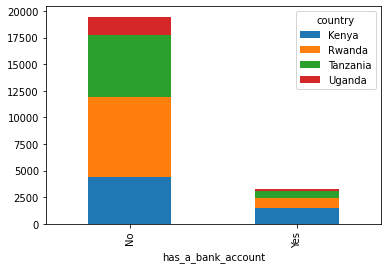

In [45]:
#9. country

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['country']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_country = financial_cleaned[['has_a_bank_account', 'country', 'uniqueid']]
bank_country_grouped = bank_country.groupby(['has_a_bank_account', 'country']).count().reset_index()
bank_country_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_country_grouped['%_total_individuals'] = round(bank_country_grouped ['total_individuals']/bank_country_grouped['total_individuals'].sum()*100, 2)
bank_country_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)

,has_a_bank_account,year,total_individuals,%_total_individuals
5,Yes,2018,1656,7.30
3,Yes,2016,979,4.31
4,Yes,2017,598,2.64
0,No,2016,7517,33.13
2,No,2018,6123,26.98
1,No,2017,5819,25.64


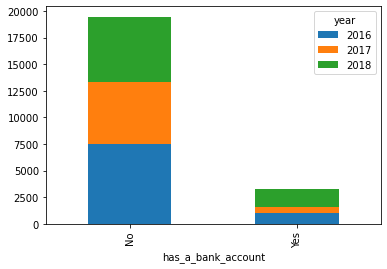

In [46]:
# 10. year

# used a stacked bar chart for visualization
pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['year']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_year = financial_cleaned[['has_a_bank_account', 'year', 'uniqueid']]
bank_year_grouped = bank_year.groupby(['has_a_bank_account', 'year']).count().reset_index()
bank_year_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_year_grouped['%_total_individuals'] = round(bank_year_grouped ['total_individuals']/bank_year_grouped['total_individuals'].sum()*100, 2)
bank_year_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)

,has_a_bank_account,relationship_with_head,total_individuals,%_total_individuals
7,Yes,Head of Household,2219,9.78
11,Yes,Spouse,688,3.03
6,Yes,Child,185,0.82
9,Yes,Other relative,64,0.28
10,Yes,Parent,58,0.26
8,Yes,Other non-relatives,19,0.08
1,No,Head of Household,10155,44.75
5,No,Spouse,5670,24.99
0,No,Child,1945,8.57
4,No,Parent,952,4.20


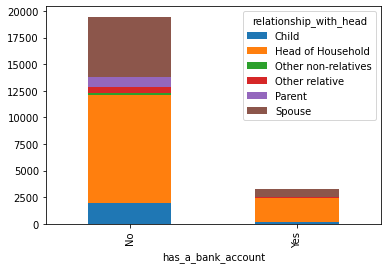

In [47]:
# relationship with head of household

# used a stacked bar chart for visualization

pd.crosstab(financial_cleaned['has_a_bank_account'], financial_cleaned['relationship_with_head']).plot(kind='bar', stacked=True)

# calculated the percentage of total individuals to standardize the data and help derive more meaningful insights
bank_rhead = financial_cleaned[['has_a_bank_account', 'relationship_with_head', 'uniqueid']]
bank_rhead_grouped = bank_rhead.groupby(['has_a_bank_account', 'relationship_with_head']).count().reset_index()
bank_rhead_grouped.rename(columns={'uniqueid':'total_individuals'}, inplace=True)

bank_rhead_grouped['%_total_individuals'] = round(bank_rhead_grouped ['total_individuals']/bank_rhead_grouped['total_individuals'].sum()*100, 2)
bank_rhead_grouped.sort_values (by=['has_a_bank_account','%_total_individuals'],ascending =False)

## Bivariate Analysis observations/conclusions

### 1. 

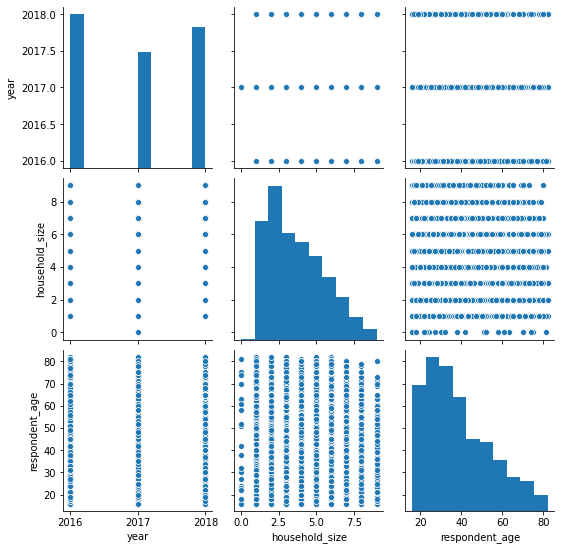

In [48]:
# Plotting the bivariate summaries and recording our observations
sns.pairplot(financial_cleaned)
plt.show()

#SECTION 6: Multivariate Analysis

#**Section 7:** Challenging the data

1. Majority of individuals surveyed were from rural areas, and yet, majority of the banks are located in the urban areas